In [1]:
# import dependencies
import random # random to generate random latitude and longitudes
import pandas as pd # pandas library
import time 
import seaborn as sns # seaborn library to set the aesthetics for the graphs
import matplotlib.pyplot as plt # for creating/plotting graphs
import numpy as np
from datetime import datetime
import openweathermapy as owm
# import API Key 
from api_keys import weather_api_key
# citypy library - to Look up for city names with geo-coordinates
from citipy import citipy 

In [2]:
import csv

In [3]:

cities = []

while len(cities)<600:
    x = (random.choice(range(-90,90))) # randomly generate numbers in range -90 & 90 for latitude
    y = (random.choice(range(-180,180))) # randomly generagte numbers in range -180 & 180 for longitude
    city = citipy.nearest_city(x,y).city_name # look up city to match the lat & long randomly generated
    if city not in cities:
        cities.append(city)
len(cities)

600

In [4]:

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": weather_api_key}

# Initialize data frame to store data from API calls
WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

In [5]:
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={weather_api_key}')
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | lorengau
http://api.openweathermap.org/data/2.5/weather?q=lorengau&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 2 of Set 0 | punta arenas
http://api.openweathermap.org/data/2.5/weather?q=punta%20arenas&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 3 of Set 0 | butaritari
http://api.openweathermap.org/data/2.5/weather?q=butaritari&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 4 of Set 0 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?q=tasiilaq&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 5 of Set 0 | visby
http://api.openweathermap.org/data/2.5/weather?q=visby&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7


/Users/owner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_valu

Processing Record 6 of Set 0 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?q=chokurdakh&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 7 of Set 0 | grand gaube
http://api.openweathermap.org/data/2.5/weather?q=grand%20gaube&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 8 of Set 0 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 9 of Set 0 | dikson
http://api.openweathermap.org/data/2.5/weather?q=dikson&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 10 of Set 0 | mar del plata
http://api.openweathermap.org/data/2.5/weather?q=mar%20del%20plata&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 11 of Set 0 | kodiak
http://api.openweathermap.org/data/2.5/weather?q=kodiak&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 12 of Set 0 | mys shmidta
http://api.openweather

Processing Record 9 of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 10 of Set 1 | hobyo
http://api.openweathermap.org/data/2.5/weather?q=hobyo&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 11 of Set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?q=hobart&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 12 of Set 1 | karamea
http://api.openweathermap.org/data/2.5/weather?q=karamea&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
HTTP Error 404: Not Found
Processing Record 13 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 14 of Set 1 | aklavik
http://api.openweathermap.org/data/2.5/weather?q=aklavik&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 15 of Set 1 | castro
http://api.openweathermap.or

Processing Record 13 of Set 2 | egvekinot
http://api.openweathermap.org/data/2.5/weather?q=egvekinot&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 14 of Set 2 | tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 15 of Set 2 | maksatikha
http://api.openweathermap.org/data/2.5/weather?q=maksatikha&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 16 of Set 2 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 17 of Set 2 | shakawe
http://api.openweathermap.org/data/2.5/weather?q=shakawe&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 18 of Set 2 | shiyan
http://api.openweathermap.org/data/2.5/weather?q=shiyan&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 19 of Set 2 | ahipara
http://api.openweathermap.org/data/2.5

Processing Record 16 of Set 3 | kuito
http://api.openweathermap.org/data/2.5/weather?q=kuito&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 17 of Set 3 | pevek
http://api.openweathermap.org/data/2.5/weather?q=pevek&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 18 of Set 3 | imeni morozova
http://api.openweathermap.org/data/2.5/weather?q=imeni%20morozova&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 19 of Set 3 | siirt
http://api.openweathermap.org/data/2.5/weather?q=siirt&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 20 of Set 3 | walla walla
http://api.openweathermap.org/data/2.5/weather?q=walla%20walla&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 21 of Set 3 | ruswil
http://api.openweathermap.org/data/2.5/weather?q=ruswil&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 22 of Set 3 | bay-ang
http://api.openweathermap.org/data/2.5/wea

Processing Record 23 of Set 4 | uglovskoye
http://api.openweathermap.org/data/2.5/weather?q=uglovskoye&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 24 of Set 4 | evensk
http://api.openweathermap.org/data/2.5/weather?q=evensk&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 25 of Set 4 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?q=beringovskiy&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 26 of Set 4 | tenno
http://api.openweathermap.org/data/2.5/weather?q=tenno&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 27 of Set 4 | hambantota
http://api.openweathermap.org/data/2.5/weather?q=hambantota&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 28 of Set 4 | kalemie
http://api.openweathermap.org/data/2.5/weather?q=kalemie&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 29 of Set 4 | mattru
http://api.openweathermap.org/data/2.5/

Processing Record 26 of Set 5 | tarauaca
http://api.openweathermap.org/data/2.5/weather?q=tarauaca&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 27 of Set 5 | wajima
http://api.openweathermap.org/data/2.5/weather?q=wajima&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 28 of Set 5 | tumannyy
http://api.openweathermap.org/data/2.5/weather?q=tumannyy&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
HTTP Error 404: Not Found
Processing Record 29 of Set 5 | fort nelson
http://api.openweathermap.org/data/2.5/weather?q=fort%20nelson&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 30 of Set 5 | kurilsk
http://api.openweathermap.org/data/2.5/weather?q=kurilsk&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 31 of Set 5 | chifeng
http://api.openweathermap.org/data/2.5/weather?q=chifeng&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 32 of Set 5 | deputatskiy
http://api.o

Processing Record 31 of Set 6 | rolim de moura
http://api.openweathermap.org/data/2.5/weather?q=rolim%20de%20moura&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
HTTP Error 404: Not Found
Processing Record 32 of Set 6 | bonthe
http://api.openweathermap.org/data/2.5/weather?q=bonthe&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 33 of Set 6 | kiama
http://api.openweathermap.org/data/2.5/weather?q=kiama&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 34 of Set 6 | ibirite
http://api.openweathermap.org/data/2.5/weather?q=ibirite&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 35 of Set 6 | bubaque
http://api.openweathermap.org/data/2.5/weather?q=bubaque&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 36 of Set 6 | muros
http://api.openweathermap.org/data/2.5/weather?q=muros&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 37 of Set 6 | te anau
http://api.openweath

Processing Record 35 of Set 7 | dunmore east
http://api.openweathermap.org/data/2.5/weather?q=dunmore%20east&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 36 of Set 7 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?q=ponta%20delgada&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 37 of Set 7 | champerico
http://api.openweathermap.org/data/2.5/weather?q=champerico&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 38 of Set 7 | zeya
http://api.openweathermap.org/data/2.5/weather?q=zeya&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 39 of Set 7 | high level
http://api.openweathermap.org/data/2.5/weather?q=high%20level&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 40 of Set 7 | naftah
http://api.openweathermap.org/data/2.5/weather?q=naftah&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
HTTP Error 404: Not Found
Processing Record 41 of Set 7 | harp

Processing Record 38 of Set 8 | merauke
http://api.openweathermap.org/data/2.5/weather?q=merauke&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 39 of Set 8 | treinta y tres
http://api.openweathermap.org/data/2.5/weather?q=treinta%20y%20tres&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 40 of Set 8 | klaksvik
http://api.openweathermap.org/data/2.5/weather?q=klaksvik&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 41 of Set 8 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?q=petropavlovsk-kamchatskiy&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 42 of Set 8 | silvan
http://api.openweathermap.org/data/2.5/weather?q=silvan&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 43 of Set 8 | morlaix
http://api.openweathermap.org/data/2.5/weather?q=morlaix&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 44 of Set 8 | coos bay

Processing Record 42 of Set 9 | manono
http://api.openweathermap.org/data/2.5/weather?q=manono&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 43 of Set 9 | heishan
http://api.openweathermap.org/data/2.5/weather?q=heishan&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 44 of Set 9 | tumbotino
http://api.openweathermap.org/data/2.5/weather?q=tumbotino&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 45 of Set 9 | alta floresta
http://api.openweathermap.org/data/2.5/weather?q=alta%20floresta&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 46 of Set 9 | ambilobe
http://api.openweathermap.org/data/2.5/weather?q=ambilobe&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 47 of Set 9 | bosaso
http://api.openweathermap.org/data/2.5/weather?q=bosaso&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 48 of Set 9 | qaqortoq
http://api.openweathermap.org/data/2.

Processing Record 49 of Set 10 | sola
http://api.openweathermap.org/data/2.5/weather?q=sola&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 50 of Set 10 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?q=los%20llanos%20de%20aridane&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 1 of Set 11 | athens
http://api.openweathermap.org/data/2.5/weather?q=athens&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 2 of Set 11 | king city
http://api.openweathermap.org/data/2.5/weather?q=king%20city&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 3 of Set 11 | kenora
http://api.openweathermap.org/data/2.5/weather?q=kenora&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 4 of Set 11 | ahome
http://api.openweathermap.org/data/2.5/weather?q=ahome&units=imperial&APPID=1fb9ce53d0bfcc6de7e31a2ee24380f7
Processing Record 5 of Set 11 | porbandar
http://api.openweatherma

In [7]:
# Display the count of cities with weather data
WeatherPy_df.count()

City          553
Cloudiness    553
Country       553
Date          553
Max Temp      553
Wind Speed    553
Lat           553
Lng           553
Humidity      553
dtype: int64

In [8]:
# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the city weather data frame
WeatherPy_df.head(10)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Lorengau,99,PG,1581442041,82.98,14.36,-2.02,147.27,79
1,Punta Arenas,75,CL,1581441743,59,4.7,-53.15,-70.92,76
2,Butaritari,100,KI,1581441802,83.16,11.95,3.07,172.79,79
3,Tasiilaq,90,GL,1581441867,23,24.16,65.61,-37.64,85
4,Visby,12,SE,1581442126,39.99,11.41,57.64,18.3,88
5,Chokurdakh,0,RU,1581441867,-28.44,1.36,70.63,147.92,65
6,Grand Gaube,75,MU,1581442116,80.6,16.11,-20.01,57.66,88
7,Hithadhoo,43,MV,1581441734,83.53,17.72,-0.6,73.08,75
8,Dikson,57,RU,1581441742,-7.1,28.3,73.51,80.55,89
9,Mar del Plata,40,AR,1581441689,73,14.99,-38,-57.56,64


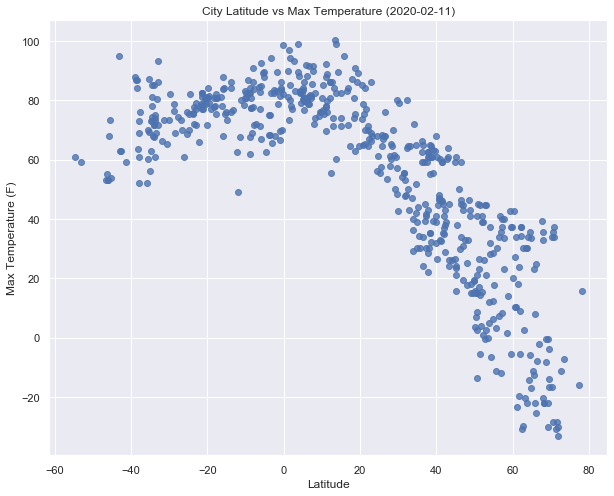

In [14]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='b', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("Lat_vs_Temp.png")
plt.show()

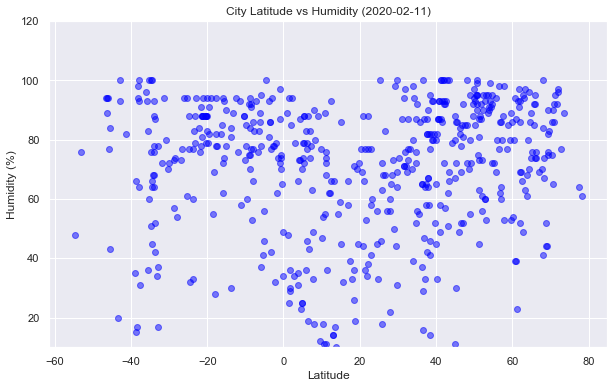

In [15]:
plt.figure(figsize=(10,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.show()

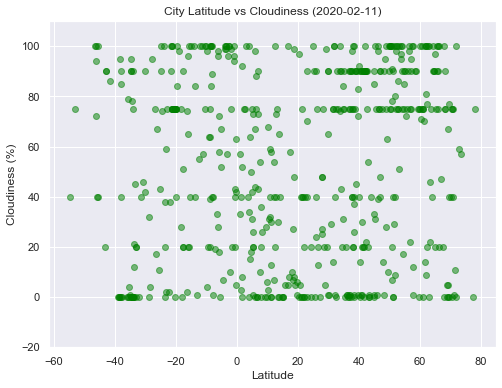

In [16]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='green', alpha=0.5)

plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.show()

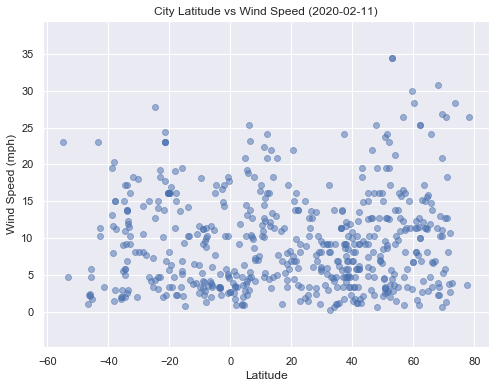

In [17]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='b', alpha=0.5)

plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show()